In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gold_monthly_csv.csv')
df.columns

Index(['Date', 'Price'], dtype='object')

In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
print(f"from {min(df['Date'])} to {max(df['Date'])}")

from 1950-01 to 2020-07


In [5]:
# cannot use "pd.to_datetime(df['Date'])" because it convert to "1950-01-01" format
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq = 'ME')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [6]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


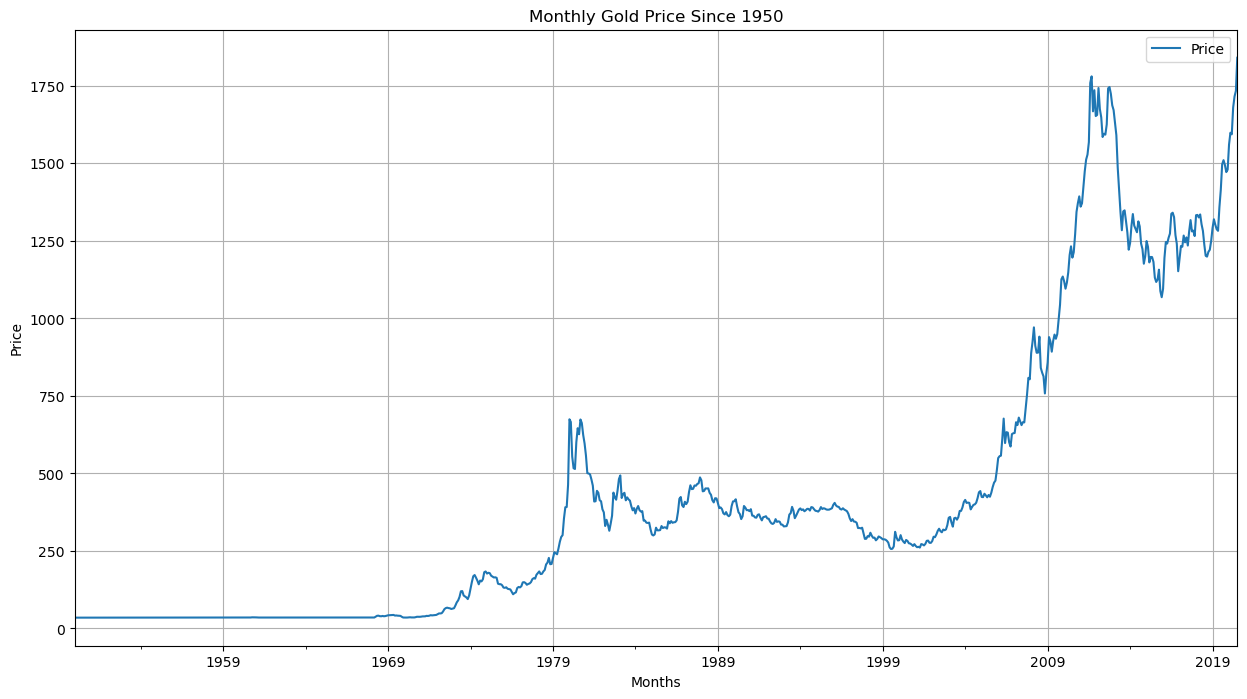

In [7]:
df.plot(figsize = (15, 8))
plt.title("Monthly Gold Price Since 1950")
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

In [8]:
round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


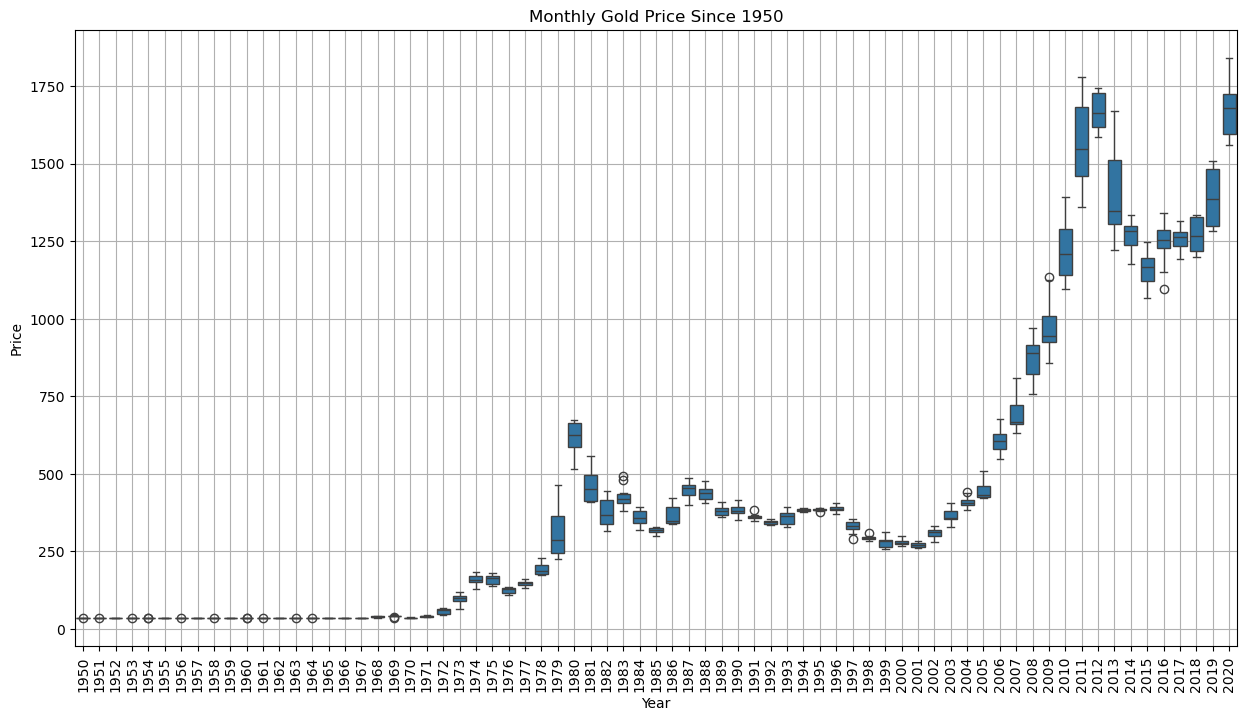

In [9]:
_, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(x = df.index.year, y = df.Price, ax=ax)

plt.title('Monthly Gold Price Since 1950')
plt.xlabel('Year')
plt.ylabel('Price')

plt.xticks(rotation = 90)
plt.grid()

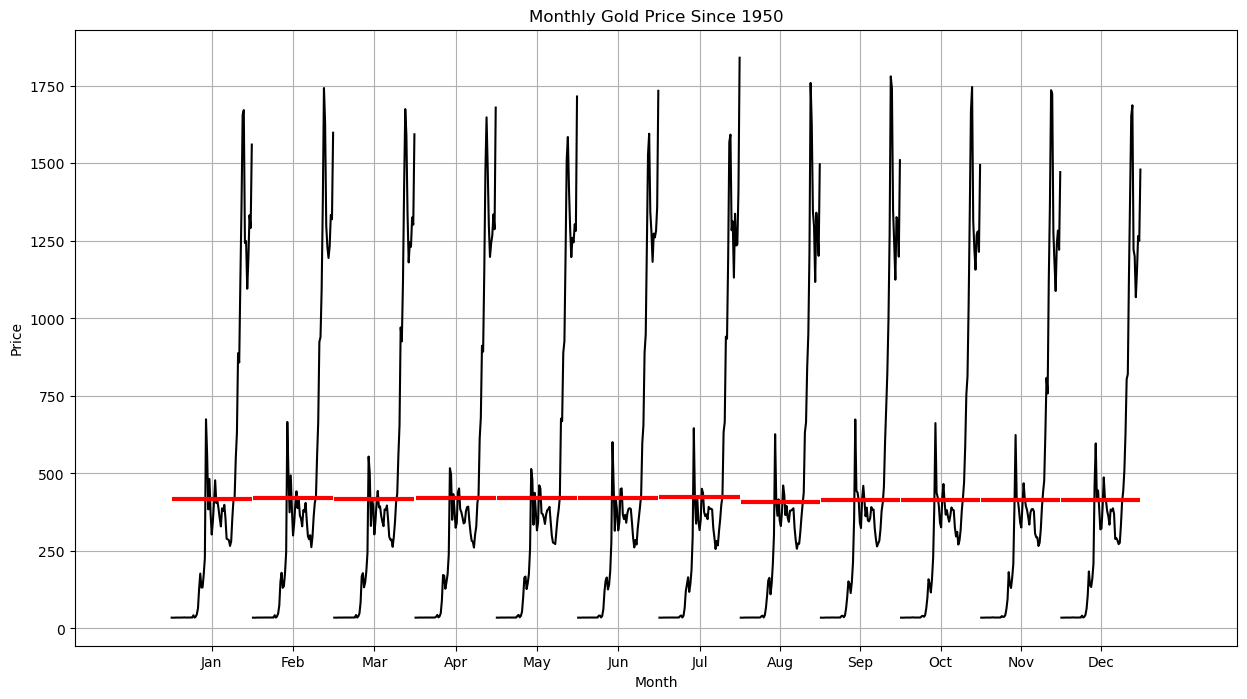

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (15, 8), )

month_plot(df, ylabel = 'Gold Price',  ax = ax)
plt.title("Monthly Gold Price Since 1950")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

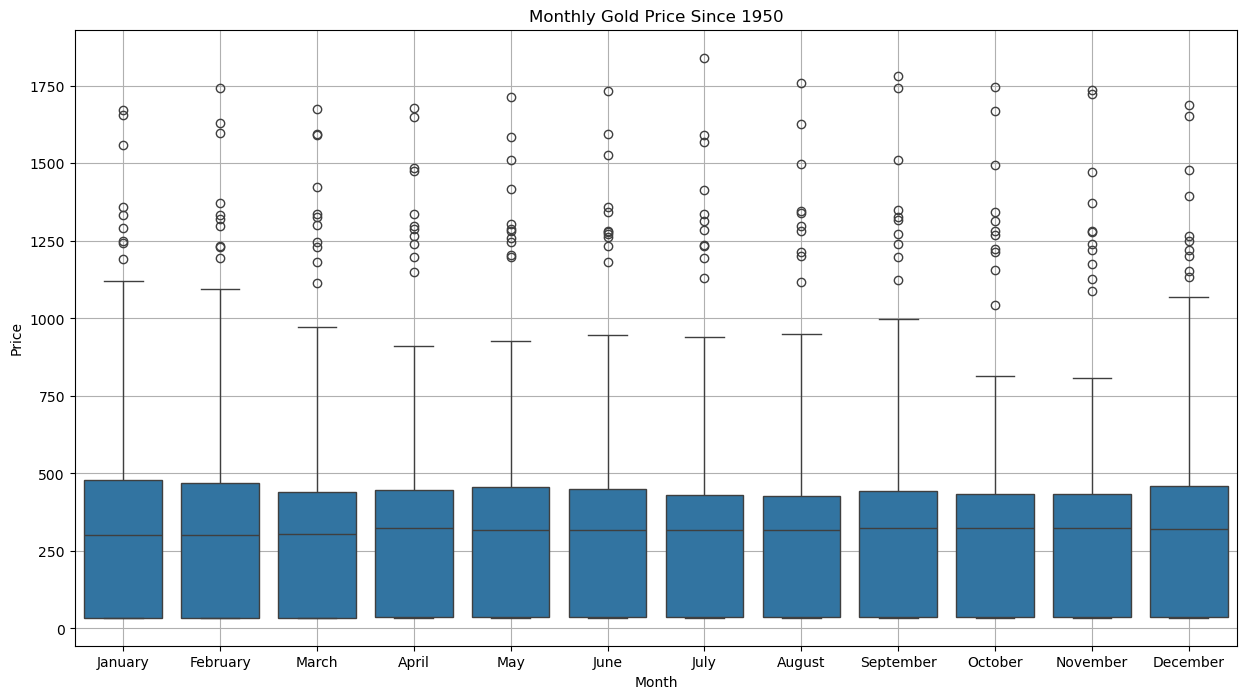

In [11]:
_, ax = plt.subplots(figsize= (15, 8))
                     
sns.boxplot(x = df.index.month_name(), y = df.Price, ax = ax)

plt.title('Monthly Gold Price Since 1950')
plt.xlabel('Month')
plt.ylabel('Price')

plt.grid()

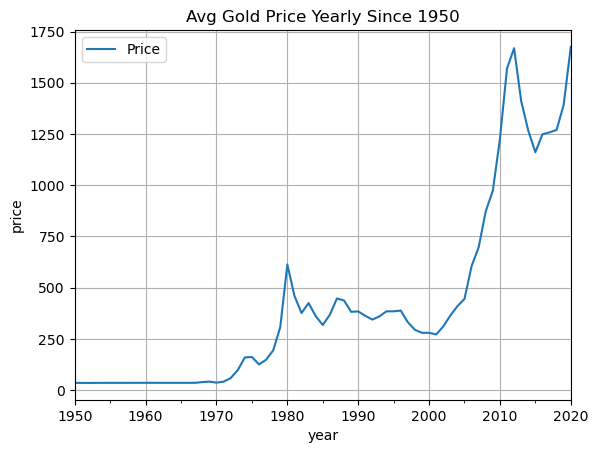

In [12]:
df_yearly_sum = df.resample('A').mean() # A = annual (split data by year)
df_yearly_sum.plot()

plt.title('Avg Gold Price Yearly Since 1950')

plt.xlabel('year')
plt.ylabel('price')
plt.grid()

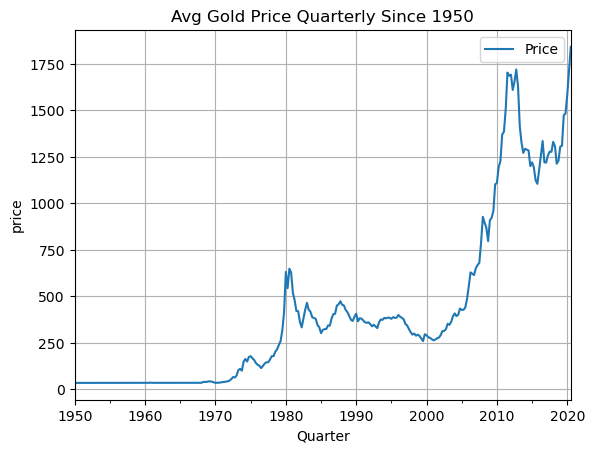

In [13]:
df_quarter_sum = df.resample('Q').mean()
df_quarter_sum.plot()

plt.title('Avg Gold Price Quarterly Since 1950')

plt.xlabel('Quarter')
plt.ylabel('price')
plt.grid()

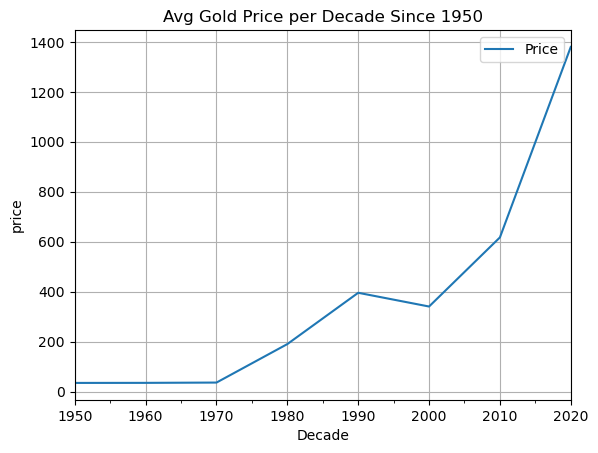

In [14]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()

plt.title('Avg Gold Price per Decade Since 1950')

plt.xlabel('Decade')
plt.ylabel('price')
plt.grid()

In [15]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price': 'Std'}), left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2) # calculate coefficient of variation
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


Text(0, 0.5, 'Coefficient of Variation (%)')

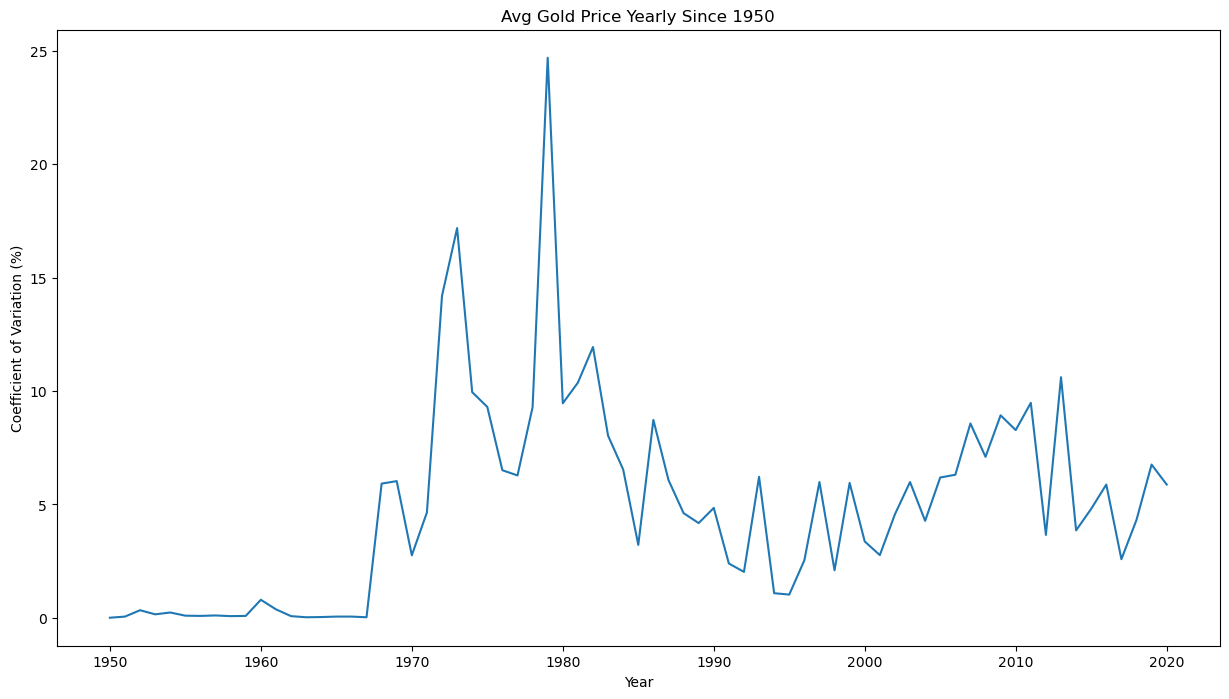

In [16]:
fig, ax = plt.subplots(figsize = (15, 8))

df_1['Cov_pct'].plot()

plt.title('Avg Gold Price Yearly Since 1950')
plt.xlabel('Year')
plt.ylabel('Coefficient of Variation (%)')

In [17]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

print(f"Train Set row: {train.shape[0]}")
print(f"Test Set row: {test.shape[0]}")

Train Set row: 792
Test Set row: 55


Text(0.5, 1.0, 'Train Test Split')

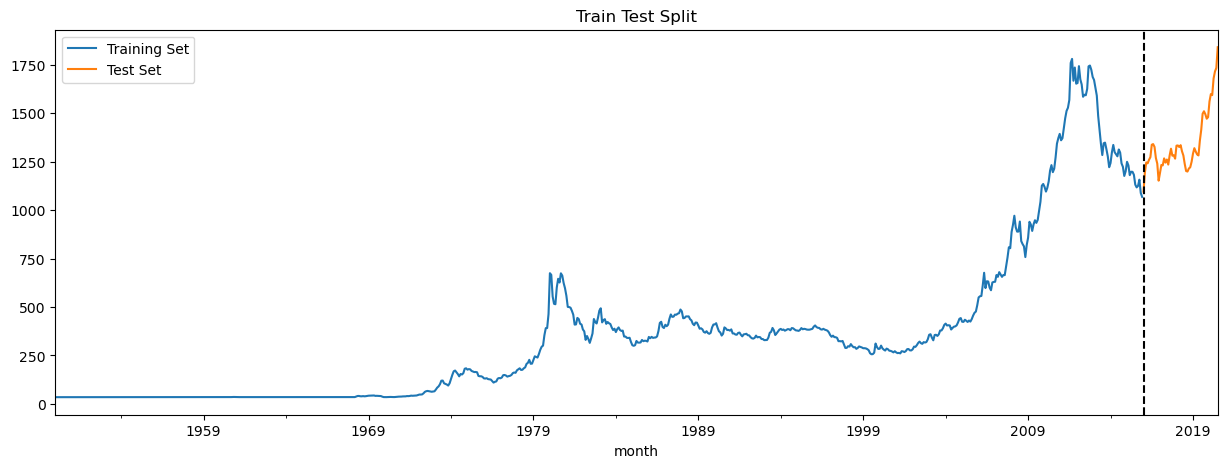

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label = 'Training Set')
test.plot(ax=ax, label = 'Test Set')

ax.axvline('01-01-2016', color = 'black', ls = '--')
ax.legend(['Training Set', 'Test Set'])
ax.set_title('Train Test Split')

In [19]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]

In [20]:
LR_train = train.copy()
LR_test = test.copy()

In [21]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [22]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train[['Price']])

LinearRegression()

Text(0.5, 1.0, 'Train Test Split')

<Figure size 1500x800 with 0 Axes>

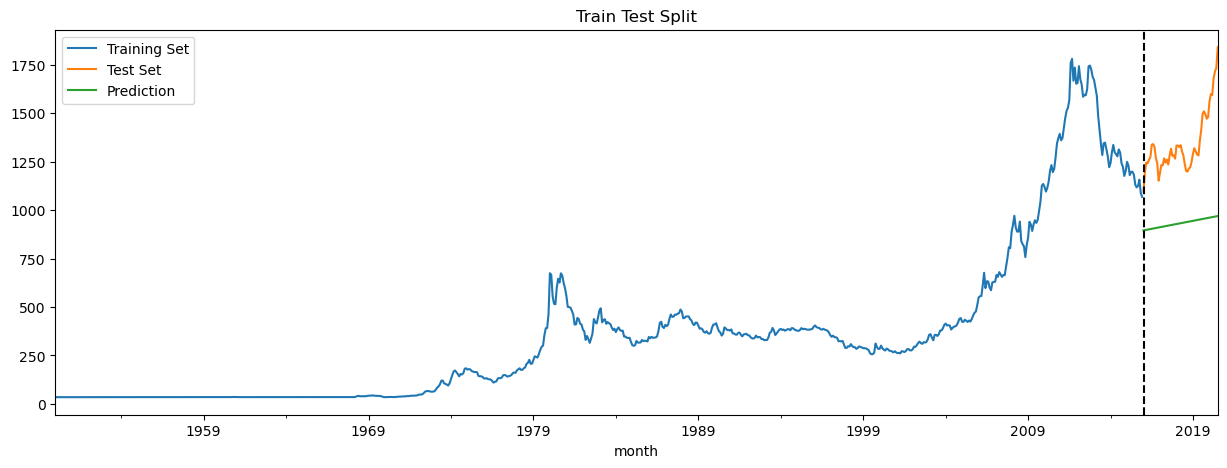

In [23]:
LR_test_pred = lr.predict(LR_test[["time"]])
LR_test['forecast'] = LR_test_pred

plt.figure(figsize = (15, 8))

# plt.plot(train['Price'], label = 'train')
# plt.plot(test['Price'], label = 'test')
# plt.plot(LR_test['forecast'], label = 'pred')
# plt.legend(loc = 'best')
# plt.grid()

fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label = 'Training Set')
test.plot(ax=ax, label = 'Test Set')
LR_test['forecast'].plot(ax=ax, label = 'Prediction')

ax.axvline('01-01-2016', color = 'black', ls = '--')
ax.legend(['Training Set', 'Test Set', 'Prediction'])
ax.set_title('Train Test Split')

In [24]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100, 2)

In [25]:
LR_mape = mape(test['Price'], LR_test['forecast'])
print(f"MAPE is {LR_mape :.3f}%")

MAPE is 29.760%


In [26]:
results = pd.DataFrame({'Test Mape (%)': [LR_mape]}, index=["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [27]:
final_model = ExponentialSmoothing(df, trend = 'additive', seasonal = 'additive')\
                .fit(smoothing_level = 0.4,
                     smoothing_trend = 0.3,
                     smoothing_seasonal = 0.6)

In [28]:
Mape_final_model = mape(df['Price'], final_model.fittedvalues)
print(f"MAPE is {Mape_final_model :.3f}%")

MAPE is 17.240%


In [29]:
predictions = final_model.forecast(steps=len(test))

start_date = test.index[0]
end_date = test.index[-1]
predictions = final_model.predict(start=start_date, end=end_date)

In [30]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
                        'prediction': predictions, 
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof=1)}, 
                       index = test.index)
pred_df.head()

,lower_CI,prediction,upper_CI
month,,,
2016-01-31,949.674695,1057.825668,1165.976640
2016-02-29,900.763420,1008.914392,1117.065364
2016-03-31,926.373637,1034.524610,1142.675582
2016-04-30,1025.102465,1133.253438,1241.404410
2016-05-31,1076.565951,1184.716924,1292.867896


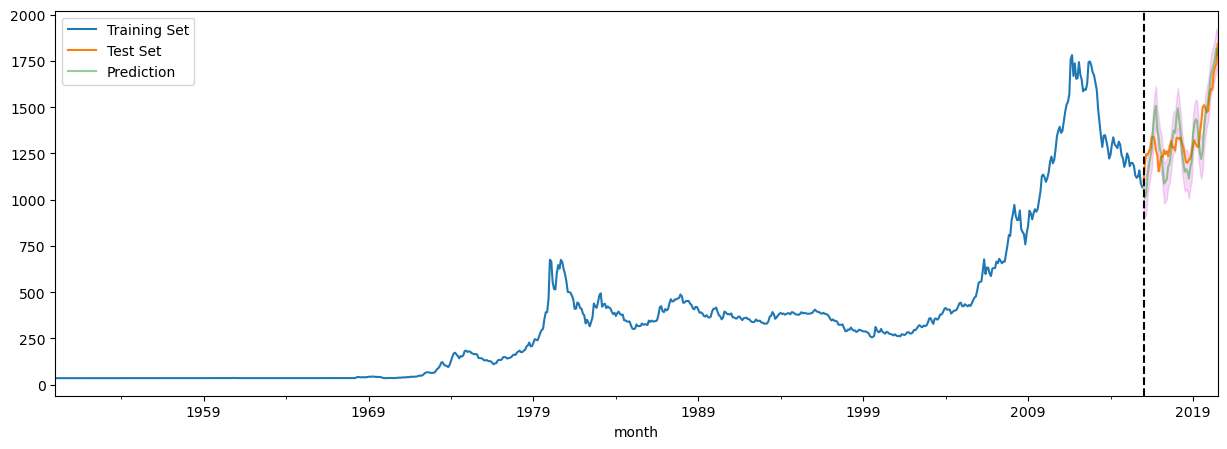

In [31]:
# axis = df.plot(label = 'Actual', figsize = (15, 9))
# pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)

# axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
# axis.set_xlabel('year-month')
# axis.set_ylabel('price')
# plt.legend(loc = 'best')

fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
pred_df['prediction'].plot(ax=ax, label='Prediction', alpha=0.5)

ax.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.15)
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set', 'Prediction'])

plt.show()